In [1]:
pip install pandas

In [2]:

pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

In [4]:
data=pd.read_csv('creditcard.csv')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.shape

(284807, 31)

In [7]:
data.size

8829017

In [9]:
data.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [11]:
#data information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
#checking the no of missing values in each column
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#distribution of legit transction & fraudlant transcation
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
#this data is highly unbalanced
#0-----> Normal Transaction
#1------>fraudulant tranction 


In [10]:
#seoerating the data for analysis
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [11]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [12]:
#statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

#Datasvisualisation

Text(0, 0.5, 'Frequency')

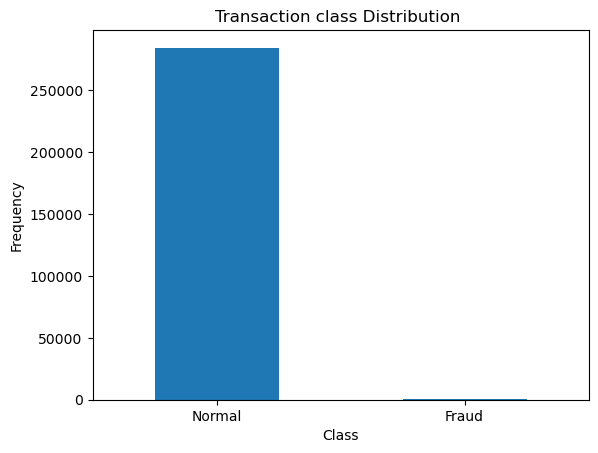

In [14]:

count_classes = pd.Series(data['Class']).value_counts(sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Transaction class Distribution ")
labels = ['Normal' , 'Fraud']
plt.xticks(range(2),labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

(-1.0999999999785004,
 1.0999999997502141,
 -1.0999999999245664,
 1.0999999999964079)

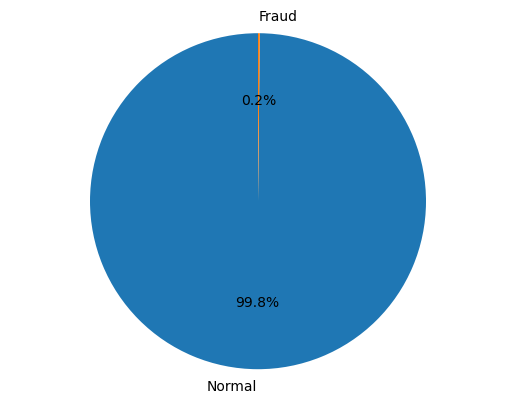

In [15]:
# plot by 
labels = ['Normal', 'Fraud'] 
sizes = [len(legit), len(fraud)] 
fig, ax = plt.subplots() 
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90) 
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle. plt.show()

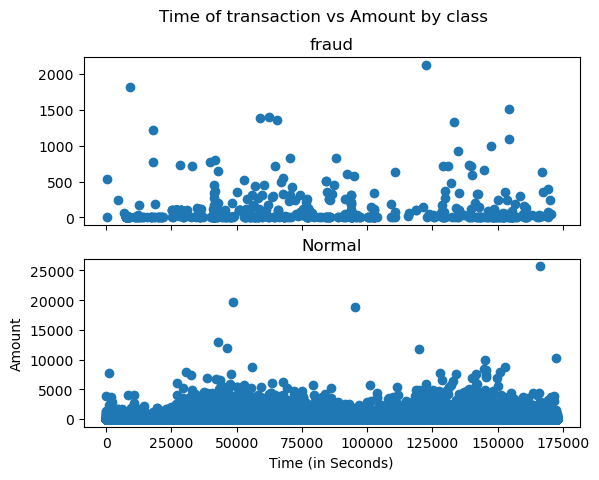

In [19]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('fraud')
ax2.scatter(legit.Time, legit.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [21]:
#campare the values for both transaction 
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [22]:
#under sampleing
#Build a sample database contaning similar distribution of normal transction and fraudlent transaction
#Number of fraudulent  transaction=492


legit_sample=legit.sample(n=492)

In [23]:
#concatenating two dataframes
new_data = pd.concat([legit_sample,fraud],axis=0)

In [24]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
224805,143969.0,2.050552,-0.122880,-1.542134,-0.059694,0.271515,-0.707967,0.187836,-0.156354,0.465059,...,-0.100978,-0.202749,0.224594,0.762122,-0.000577,-0.132431,-0.061567,-0.066991,1.00,0
76688,56699.0,-1.181207,-1.951604,3.063446,-1.738750,-0.918976,-0.381338,-1.333012,0.146660,-0.765473,...,-0.045390,0.382562,-0.154181,0.397571,0.541051,-0.035650,-0.102007,-0.136118,50.00,0
75650,56180.0,-1.537118,0.933174,1.652761,0.945839,-0.421664,0.204043,-0.119953,0.259814,1.107821,...,0.093543,0.717023,-0.258262,0.076872,-0.109912,-0.159765,0.276468,0.412329,26.94,0
103511,68691.0,1.191919,0.333270,0.419774,0.717285,-0.323136,-0.784388,0.029809,-0.098389,-0.026810,...,-0.236527,-0.637111,0.197166,0.366041,0.107576,0.103273,-0.004572,0.031047,0.99,0
153524,99316.0,-0.652448,0.940065,-0.736708,-1.645053,2.308564,3.679711,-0.599225,1.507207,1.512711,...,-0.385326,-0.948002,0.078117,0.499094,-0.127655,-0.269292,0.150143,0.032829,14.13,0


In [25]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [26]:
new_data['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [27]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95572.215447,-0.044549,0.105572,-0.042814,0.037689,0.070612,-0.088477,0.024199,0.045900,0.092046,...,0.027101,-0.028483,-0.011775,-0.065840,-0.013392,-0.011473,-0.004850,0.011610,0.014846,77.679492
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [28]:
#splitting the data into feature & Targets 
X = new_data.drop(columns='Class',axis=1)
Y = new_data['Class']

In [27]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
133568,80441.0,1.147559,0.096287,0.578643,0.608911,-0.347284,-0.259925,-0.145517,0.101065,0.146294,...,-0.222309,-0.189239,-0.523932,0.247284,0.066303,-0.003832,0.136316,-0.001286,0.013835,2.58
87501,61714.0,1.031611,-0.290899,1.413902,1.030601,-1.356845,-0.572947,-0.497471,-0.008218,0.801373,...,0.037641,-0.014893,0.043406,0.039082,0.985012,0.181291,0.275281,0.010262,0.044119,67.33
54151,46309.0,-0.336643,0.960194,0.782522,0.295407,0.888969,-0.125201,0.978896,0.043005,-1.050920,...,-0.078743,0.143502,0.379881,-0.281086,-0.299985,0.355887,-0.304049,0.022777,0.001714,13.99
174371,121882.0,-0.410291,0.901684,-0.824061,-1.006274,1.842150,1.214854,0.883034,0.459675,-0.282889,...,-0.118709,-0.144306,-0.305015,-0.115215,-1.064584,-0.140424,0.443031,0.129940,0.067969,31.90
135521,81292.0,1.157012,0.111409,0.215256,1.170074,-0.452860,-0.988826,0.172807,-0.157188,0.211253,...,-0.152177,0.036789,-0.023226,-0.119638,0.357945,0.618893,-0.328019,-0.004782,0.024816,48.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [28]:
Y

133568    0
87501     0
54151     0
174371    0
135521    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [29]:
#split the data into traning data and testing datas
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state =2)

In [30]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


In [31]:
#modal training 
#logistics regression
model = LogisticRegression()

In [32]:
#training the logistics regression model with traning data
model.fit(X_train,Y_train)

LogisticRegression()

In [33]:
#model evaluation
#Accuracy Score on traning data
X_train_prediction = model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [34]:
print('Accuracy on traning data:',training_data_accuracy)

Accuracy on traning data: 0.940279542566709


In [35]:
#Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [36]:
print('Accuracy on test data:',test_data_accuracy)

Accuracy on test data: 0.9441624365482234


Confusion Matrix - Logistic Regression
[[92  3]
 [ 8 94]]


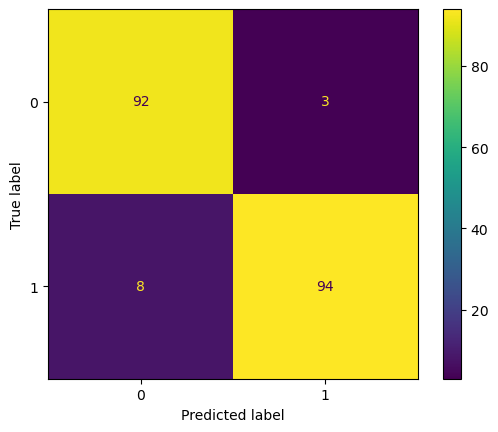

In [78]:
confusion_matrix_lr = confusion_matrix(Y_test, X_test_prediction.round())
print("Confusion Matrix - Logistic Regression")
print(confusion_matrix_lr)
#plot_confusion_matrix(confusion_matrix_lr, classes=[0, 1], title= "Confusion Matrix - Random Forest")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lr)
disp.plot()
plt.show()

In [79]:
#Evaluation of Logistic regression 
print("Evaluation of Logistic regression Model")
print()
accuracy_lr = accuracy_score(Y_test, X_test_prediction.round())
precision_lr = precision_score(Y_test, X_test_prediction.round())
recall_lr = recall_score(Y_test, X_test_prediction.round())
f1score_lr = f1_score(Y_test, X_test_prediction.round())
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1_score: {f1score_lr}")

Evaluation of Logistic regression Model

Accuracy: 0.9441624365482234
Precision: 0.9690721649484536
Recall: 0.9215686274509803
F1_score: 0.9447236180904522


In [38]:

#ramdom forest classifier
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train,Y_train)

RandomForestClassifier()

In [43]:
predictions_rf = random_forest.predict(X_test)
random_forest_accuracy= accuracy_score(predictions_rf,Y_test)
print("Random forest accuracy",random_forest_accuracy)

Random forest accuracy 0.934010152284264


Confusion Matrix - Random Forest
[[93  2]
 [11 91]]


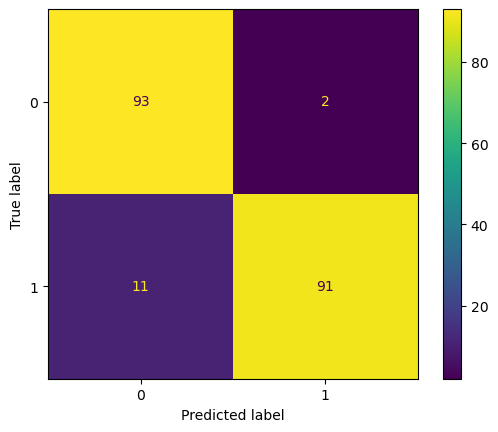

In [61]:
confusion_matrix_rf = confusion_matrix(Y_test, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)
#plot_confusion_matrix(confusion_matrix_rf, classes=[0, 1], title= "Confusion Matrix - Random Forest")
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.show()

In [76]:
from sklearn.metrics import accuracy_score
print("Evaluation of Random Forest Model")
print()
accuracy = accuracy_score(Y_test, predictions_rf.round())
precision = precision_score(Y_test, predictions_rf.round())
recall = recall_score(Y_test, predictions_rf.round())
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Evaluation of Random Forest Model

Accuracy: 0.934010152284264
Precision: 0.978494623655914
Recall: 0.8921568627450981


In [81]:
print("Accuracy of logistic regression :",accuracy_lr)
print("Accuracy of Random Forest :",accuracy)

Accuracy of logistic regression : 0.9441624365482234
Accuracy of Random Forest : 0.934010152284264
